In [40]:
library(ggplot2)
library(RColorBrewer)
library(hrbrthemes)
theme_set(
    theme_ipsum(base_family = "") +
    theme(
        axis.title.x = element_text(hjust = 0.5, size = 11),
        axis.title.y = element_text(hjust = 0.5, size = 11),
    )
)

In [41]:
# Create Poisson process with lambda_Nt in duration $t$
# Result: c(number of arrival, c(time of arrival))
HomogeneousPoissonProcess <- function(lambda_Nt,t){
    set.seed(10)
    pp <- rpois(1,lambda_Nt * t)
    c(pp, 0,sort(runif(pp,0,t)),t)
}

In [42]:
# Create nb_process risk processes with the same serie $T_{N_t}$
# but different series X_n with the same lambda_Xn

# $u$ is initial wallet, $c$ is the rate, $t$ is duration

# Result: a data frame of serie $T_{N_t}$
# with nb_process columns for nb_process processes
risk_process <- function(u,c,t,lambda_Nt,lambda_Xn,nb_process){

    set.seed(10)
    PP = HomogeneousPoissonProcess(lambda_Nt, t)

    df <- data.frame(time = PP[2:length(PP)])

    for (j in 1:nb_process){
        X <- 0
        val <- NULL
        
        for (i in 1:(PP[1]+2)){
            val <- c(val,u + c * PP[i+1] - X)
            if (i!=PP[1]+1){
                X <- X + rexp(1,lambda_Xn)
            }
        }
        df[as.character(j)] <- val
    }
    df
}

In [55]:
# Initiate value
u <- 0
c <- 2
t <- 100
lambda_Nt <- 0.7
lambda_Xn <- 0.35
nb_process <- 5

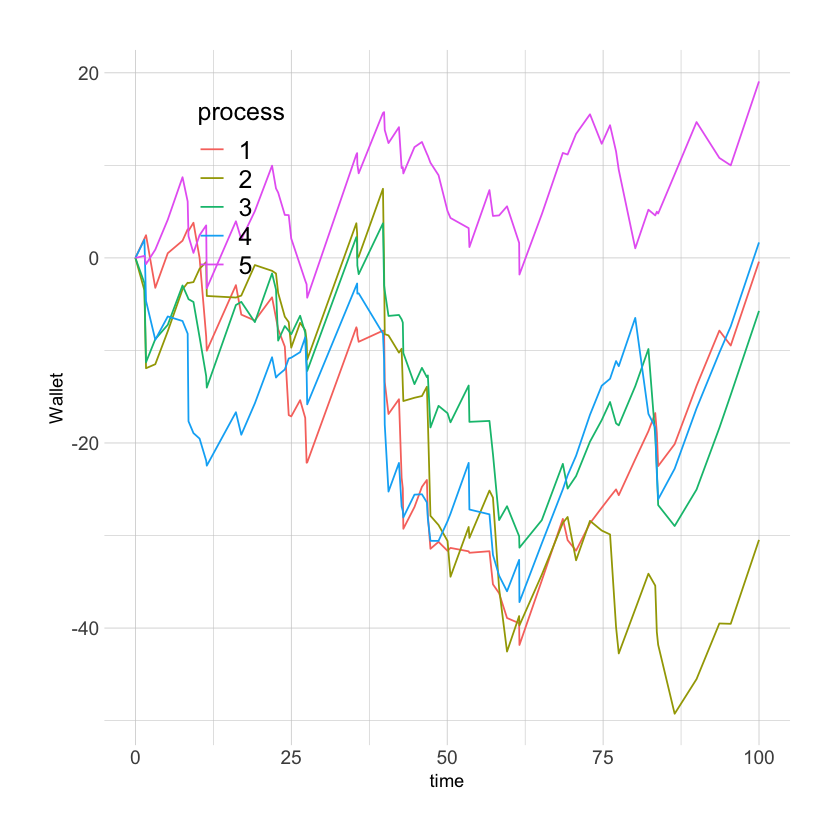

In [56]:
value = risk_process(u,c,t,lambda_Nt,lambda_Xn,nb_process)

library(reshape2)
df <- melt(value ,  id.vars = 'time', variable.name = 'process')

ggplot(df, aes(time, value)) +
    geom_line(aes(colour = process))+
    theme(legend.position=c(0.2,0.8),
        legend.text = element_text(size=15),
        legend.title= element_text(size=15))+
        scale_y_continuous(name="Wallet")

